# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [49]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


[111  17  11 ...,  44  17   0]


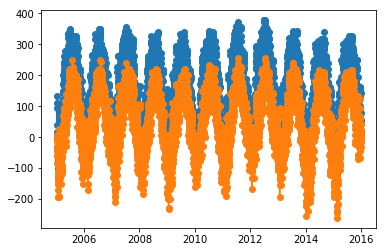

In [2]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
# print(df)
df.set_index("ID", inplace=True)
# print(df)
df_UMich = df.loc['USC00200230'].sort(['Date'])
# print(df_UMich)
df_UMich = df_UMich.reset_index()
# print(df_UMich)

numb = 0
numb_list = []
for date in df_UMich['Date']:
    if '2008-02-29' in date:
        numb_list.append(numb)
        numb += 1
    elif '2012-02-29' in date:
        numb_list.append(numb)
        numb += 1
    numb+=1

# print(numb_list)
# print(len(df_UMich))
df_UMich = df_UMich.drop(numb_list)
# print(len(df_UMich))

# num = 0
# for el in df_UMich_group:
#     if 'TMAX' not in str(el[1]) or 'TMIN' not in str(el[1]):
#         print(el)
#     continue

# ('2006-08-30',                ID        Date Element  Data_Value
# 1212  USC00200230  2006-08-30    TMAX         244)
# ('2009-03-07',                ID        Date Element  Data_Value
# 3051  USC00200230  2009-03-07    TMAX         150)
# ('2010-10-08',                ID        Date Element  Data_Value
# 4210  USC00200230  2010-10-08    TMAX         261)
# ('2012-05-01',                ID        Date Element  Data_Value
# 5351  USC00200230  2012-05-01    TMIN          94)
# ('2012-08-09',                ID        Date Element  Data_Value
# 5550  USC00200230  2012-08-09    TMAX         278)
# ('2014-03-12',                ID        Date Element  Data_Value
# 6709  USC00200230  2014-03-12    TMAX          83)

# print(len(df_UMich_group['Date'])) #4017
# for date in df_UMich_group['Date']:
#     if '02-29' in date[0]:
#         print(date)

df_UMich_dates = df_UMich['Date'].unique()
# print(len(df_UMich_dates))

df_UMich_TMAX = df_UMich.loc[df_UMich['Element'] == 'TMAX']['Data_Value']
df_UMich_TMIN = df_UMich.loc[df_UMich['Element'] == 'TMIN']['Data_Value']

df_UMich_TMAX_array = df_UMich_TMAX.values
df_UMich_TMIN_array = df_UMich_TMIN.values

df_UMich_dates = np.delete(df_UMich_dates,[0,1,2,3])
df_UMich_TMAX_array = np.delete(df_UMich_TMAX_array,[0,1])
# print(len(df_UMich_TMAX_array))
# print(len(df_UMich_TMIN_array))
# print(len(df_UMich_dates))
print(df_UMich_TMAX_array)
# print(df_UMich_TMIN_array)
# print(df_UMich_dates)

observation_dates_array = df_UMich_dates
observation_dates = list(map(pd.to_datetime, observation_dates_array)) # trying to plot a map will result in an error
plt.plot(observation_dates, df_UMich_TMAX_array, '-o',  observation_dates, df_UMich_TMIN_array, '-o')
plt.show()




In [27]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
# print(df)
df.set_index("ID", inplace=True)
# print(df)
df_UMich = df.loc['USC00200230'].sort(['Date'])
# print(df_UMich)
df_UMich = df_UMich.reset_index()
# print(df_UMich)

# print(len(df_UMich['Date'])) #8032

# numb = 0
# numb_list = []
# for date in df_UMich['Date']:
#     if '2008-02-29' in date:
#         numb_list.append(numb)
#         numb += 1
#     elif '2012-02-29' in date:
#         numb_list.append(numb)
#         numb += 1
#     numb+=1

# print(numb_list)
# print(len(df_UMich))
# df_UMich = df_UMich.drop(numb_list)
# print(len(df_UMich)) #8028

# num = 0
# for el in df_UMich_group:
#     if 'TMAX' not in str(el[1]) or 'TMIN' not in str(el[1]):
#         print(el)
#     continue

# ('2006-08-30',                ID        Date Element  Data_Value
# 1212  USC00200230  2006-08-30    TMAX         244)
# ('2009-03-07',                ID        Date Element  Data_Value
# 3051  USC00200230  2009-03-07    TMAX         150)
# ('2010-10-08',                ID        Date Element  Data_Value
# 4210  USC00200230  2010-10-08    TMAX         261)
# ('2012-05-01',                ID        Date Element  Data_Value
# 5351  USC00200230  2012-05-01    TMIN          94)
# ('2012-08-09',                ID        Date Element  Data_Value
# 5550  USC00200230  2012-08-09    TMAX         278)
# ('2014-03-12',                ID        Date Element  Data_Value
# 6709  USC00200230  2014-03-12    TMAX          83)

# print(len(df_UMich_group['Date'])) #4017
# for date in df_UMich_group['Date']:
#     if '02-29' in date[0]:
#         print(date)

# print(len(df_UMich['Date'])) #8028
# df_UMich_dates = df_UMich['Date'].unique()
# print(len(df_UMich_dates)) #4017

# print(df_UMich_dates)
# print(type(df_UMich_dates))

df_UMich_TMAX = df_UMich.loc[df_UMich['Element'] == 'TMAX']['Data_Value']
df_UMich_TMIN = df_UMich.loc[df_UMich['Element'] == 'TMIN']['Data_Value']
# print(type(df_UMich_TMAX))
# print(df_UMich_TMAX)

df_UMich_TMAX_array = df_UMich_TMAX.values
df_UMich_TMIN_array = df_UMich_TMIN.values

# df_UMich_dates = np.delete(df_UMich_dates,[0,1,2,3])
# df_UMich_TMAX_array = np.delete(df_UMich_TMAX_array,[0,1])
# print(len(df_UMich_TMAX_array))
# print(len(df_UMich_TMIN_array))
# print(len(df_UMich_dates))
# print(df_UMich_TMAX_array)
# print(df_UMich_TMIN_array)
# print(df_UMich_dates)

# function to get unique values 
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list and x[5:] != '02-29': 
            unique_list.append(x) 
    return unique_list

days_list = []
for date in df_UMich['Date']:
    if '2008' in date:
        days_list.append(date)
# print(unique(days_list))
print(len(unique(days_list)))

days_without_year_list = []
for date in days_list:
    days_without_year_list.append(date[5:])
# print(unique(days_without_year_list))

# observation_dates_array = df_UMich_dates
# observation_dates = list(map(pd.to_datetime, observation_dates_array)) # trying to plot a map will result in an error
# plt.plot(observation_dates, df_UMich_TMAX_array, '-o',  observation_dates, df_UMich_TMIN_array, '-o')
# plt.show()




365


/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [28]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
# print(df)
df.set_index("ID", inplace=True)
# print(df)
df_UMich = df.loc['USC00200230'].sort(['Date'])
# print(df_UMich)
df_UMich = df_UMich.reset_index()
# print(df_UMich)


df_UMich_TMAX = df_UMich.loc[df_UMich['Element'] == 'TMAX']
df_UMich_TMIN = df_UMich.loc[df_UMich['Element'] == 'TMIN']
# print(type(df_UMich_TMAX))
# print(df_UMich_TMAX)

# df_UMich_TMAX_array = df_UMich_TMAX.values
# df_UMich_TMIN_array = df_UMich_TMIN.values

# df_UMich_dates = np.delete(df_UMich_dates,[0,1,2,3])
# df_UMich_TMAX_array = np.delete(df_UMich_TMAX_array,[0,1])
# print(len(df_UMich_TMAX_array))
# print(len(df_UMich_TMIN_array))
# print(len(df_UMich_dates))
# print(df_UMich_TMAX_array)
# print(df_UMich_TMIN_array)
# print(df_UMich_dates)

# function to get unique values 
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list and x[5:] != '02-29': 
            unique_list.append(x) 
    return unique_list

days_list = []
for date in df_UMich['Date']:
    if '2008' in date:
        days_list.append(date)
# print(unique(days_list))
# print(len(unique(days_list)))

days_without_year_list = []
for date in days_list:
    days_without_year_list.append(date[5:])
# print(unique(days_without_year_list))

# Next, get record high and record low of each date between 2005 to 2014
date_TMAX_dic = {}
    
date_TMAX_dic = {day_el: [] for day_el in days_without_year_list}

for day_el in days_without_year_list:
    for el_df_UMich_TMAX in df_UMich_TMAX['Date']:
        if day_el in el_df_UMich_TMAX:
            date_TMAX_dic[day_el].append(df_UMich_TMAX.loc[df_UMich_TMAX['Date'] == el_df_UMich_TMAX]['Data_Value'])
            

df_dic = date_TMAX_dic
date_TMAX_dic_2 = {}
date_TMAX_dic_2 = {day_el: [-500] for day_el in days_without_year_list}

for day_dic_el in df_dic:
    for el in df_dic[day_dic_el]:
        if el.values[0] > date_TMAX_dic_2[day_dic_el]:
            date_TMAX_dic_2[day_dic_el] = el.values[0]

# print(date_TMAX_dic_2)


#Now I got a max temp on each day
#Next, do the same thing for TMIN



# date_TMAX_dic_2[day_dic_el].append(el.values[0])

# print(len(df_UMich_TMAX['Date']))
# print(df_UMich_TMAX)


# df_UMich_TMAX.loc[df_UMich_TMAX['Element'] == 'TMAX']
            
# observation_dates_array = df_UMich_dates
# observation_dates = list(map(pd.to_datetime, observation_dates_array)) # trying to plot a map will result in an error
# plt.plot(observation_dates, df_UMich_TMAX_array, '-o',  observation_dates, df_UMich_TMIN_array, '-o')
# plt.show()




/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [29]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
# print(df)
df.set_index("ID", inplace=True)
# print(df)
df_UMich = df.loc['USC00200230'].sort(['Date'])
# print(df_UMich)
df_UMich = df_UMich.reset_index()
# print(df_UMich)


df_UMich_TMAX = df_UMich.loc[df_UMich['Element'] == 'TMAX']
df_UMich_TMIN = df_UMich.loc[df_UMich['Element'] == 'TMIN']
# print(type(df_UMich_TMAX))
# print(df_UMich_TMAX)

# df_UMich_TMAX_array = df_UMich_TMAX.values
# df_UMich_TMIN_array = df_UMich_TMIN.values

# df_UMich_dates = np.delete(df_UMich_dates,[0,1,2,3])
# df_UMich_TMAX_array = np.delete(df_UMich_TMAX_array,[0,1])
# print(len(df_UMich_TMAX_array))
# print(len(df_UMich_TMIN_array))
# print(len(df_UMich_dates))
# print(df_UMich_TMAX_array)
# print(df_UMich_TMIN_array)
# print(df_UMich_dates)

# function to get unique values 
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list and x[5:] != '02-29': 
            unique_list.append(x) 
    return unique_list

days_list = []
for date in df_UMich['Date']:
    if '2008' in date:
        days_list.append(date)
# print(unique(days_list))
# print(len(unique(days_list)))

days_without_year_list = []
for date in days_list:
    days_without_year_list.append(date[5:])
# print(unique(days_without_year_list))

# Next, get record high and record low of each date between 2005 to 2014
date_TMAX_dic = {}
    
date_TMAX_dic = {day_el: [] for day_el in days_without_year_list}

for day_el in days_without_year_list:
    for el_df_UMich_TMAX in df_UMich_TMAX['Date']:
        if day_el in el_df_UMich_TMAX:
            date_TMAX_dic[day_el].append(df_UMich_TMAX.loc[df_UMich_TMAX['Date'] == el_df_UMich_TMAX]['Data_Value'])
            

df_dic = date_TMAX_dic
date_TMAX_dic_2 = {}
date_TMAX_dic_2 = {day_el: [-500] for day_el in days_without_year_list}

for day_dic_el in df_dic:
    for el in df_dic[day_dic_el]:
        if el.values[0] > date_TMAX_dic_2[day_dic_el]:
            date_TMAX_dic_2[day_dic_el] = el.values[0]

# print(date_TMAX_dic_2)


#Now I got a max temp on each day
#Next, do the same thing for TMIN
date_TMIN_dic = {}
    
date_TMIN_dic = {day_el: [] for day_el in days_without_year_list}

for day_el in days_without_year_list:
    for el_df_UMich_TMIN in df_UMich_TMIN['Date']:
        if day_el in el_df_UMich_TMIN:
            date_TMIN_dic[day_el].append(df_UMich_TMIN.loc[df_UMich_TMIN['Date'] == el_df_UMich_TMIN]['Data_Value'])
            

df_dic = date_TMIN_dic
date_TMIN_dic_2 = {}
date_TMIN_dic_2 = {day_el: [500] for day_el in days_without_year_list}

for day_dic_el in df_dic:
    for el in df_dic[day_dic_el]:
        if el.values[0] < date_TMIN_dic_2[day_dic_el]:
            date_TMIN_dic_2[day_dic_el] = el.values[0]

# print(date_TMIN_dic_2)


# date_TMAX_dic_2[day_dic_el].append(el.values[0])

# print(len(df_UMich_TMAX['Date']))
# print(df_UMich_TMAX)


# df_UMich_TMAX.loc[df_UMich_TMAX['Element'] == 'TMAX']
            
# observation_dates_array = df_UMich_dates
# observation_dates = list(map(pd.to_datetime, observation_dates_array)) # trying to plot a map will result in an error
# plt.plot(observation_dates, df_UMich_TMAX_array, '-o',  observation_dates, df_UMich_TMIN_array, '-o')
# plt.show()




/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [30]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
# print(df)
df.set_index("ID", inplace=True)
# print(df)
df_UMich = df.loc['USC00200230'].sort(['Date'])
# print(df_UMich)
df_UMich = df_UMich.reset_index()
# print(df_UMich)

# Here, let's use only data from 2005 to 2014, not 2015, and re-name the dataframe as df_UMich

for col in df_UMich.columns: 
    print(col)

# print(df_UMich)
df_UMich = df_UMich.loc[df_UMich['Date'].apply(lambda x: x.split('-')[0] in ['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014'] )] 
# print(df_UMich)

df_UMich_TMAX = df_UMich.loc[df_UMich['Element'] == 'TMAX']
df_UMich_TMIN = df_UMich.loc[df_UMich['Element'] == 'TMIN']
# print(type(df_UMich_TMAX))
# print(df_UMich_TMAX)

# df_UMich_TMAX_array = df_UMich_TMAX.values
# df_UMich_TMIN_array = df_UMich_TMIN.values

# df_UMich_dates = np.delete(df_UMich_dates,[0,1,2,3])
# df_UMich_TMAX_array = np.delete(df_UMich_TMAX_array,[0,1])
# print(len(df_UMich_TMAX_array))
# print(len(df_UMich_TMIN_array))
# print(len(df_UMich_dates))
# print(df_UMich_TMAX_array)
# print(df_UMich_TMIN_array)
# print(df_UMich_dates)

# function to get unique values 
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list and x[5:] != '02-29': 
            unique_list.append(x) 
    return unique_list

days_list = []
for date in df_UMich['Date']:
    if '2008' in date:
        days_list.append(date)
# print(unique(days_list))
# print(len(unique(days_list)))

days_without_year_list = []
for date in days_list:
    days_without_year_list.append(date[5:])
# print(unique(days_without_year_list))

# Next, get record high and record low of each date between 2005 to 2014
date_TMAX_dic = {}
    
date_TMAX_dic = {day_el: [] for day_el in days_without_year_list}

for day_el in days_without_year_list:
    for el_df_UMich_TMAX in df_UMich_TMAX['Date']:
        if day_el in el_df_UMich_TMAX:
            date_TMAX_dic[day_el].append(df_UMich_TMAX.loc[df_UMich_TMAX['Date'] == el_df_UMich_TMAX]['Data_Value'])
            

df_dic = date_TMAX_dic
date_TMAX_dic_2 = {}
date_TMAX_dic_2 = {day_el: [-500] for day_el in days_without_year_list}

for day_dic_el in df_dic:
    for el in df_dic[day_dic_el]:
        if el.values[0] > date_TMAX_dic_2[day_dic_el]:
            date_TMAX_dic_2[day_dic_el] = el.values[0]

print(date_TMAX_dic_2)


#Now I got a max temp on each day
#do the same thing for TMIN
date_TMIN_dic = {}
    
date_TMIN_dic = {day_el: [] for day_el in days_without_year_list}

for day_el in days_without_year_list:
    for el_df_UMich_TMIN in df_UMich_TMIN['Date']:
        if day_el in el_df_UMich_TMIN:
            date_TMIN_dic[day_el].append(df_UMich_TMIN.loc[df_UMich_TMIN['Date'] == el_df_UMich_TMIN]['Data_Value'])
            

df_dic = date_TMIN_dic
date_TMIN_dic_2 = {}
date_TMIN_dic_2 = {day_el: [500] for day_el in days_without_year_list}

for day_dic_el in df_dic:
    for el in df_dic[day_dic_el]:
        if el.values[0] < date_TMIN_dic_2[day_dic_el]:
            date_TMIN_dic_2[day_dic_el] = el.values[0]

print(date_TMIN_dic_2)


# Now, I use only data from 2005-2014, currently I am using all years from 2004 to 2015
# Next, let's do the same thing with only 2015 data


# date_TMAX_dic_2[day_dic_el].append(el.values[0])

# print(len(df_UMich_TMAX['Date']))
# print(df_UMich_TMAX)


# df_UMich_TMAX.loc[df_UMich_TMAX['Element'] == 'TMAX']
            
# observation_dates_array = df_UMich_dates
# observation_dates = list(map(pd.to_datetime, observation_dates_array)) # trying to plot a map will result in an error
# plt.plot(observation_dates, df_UMich_TMAX_array, '-o',  observation_dates, df_UMich_TMIN_array, '-o')
# plt.show()




/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


ID
Date
Element
Data_Value
{'01-01': 122, '01-02': 111, '01-03': 111, '01-04': 89, '01-05': 100, '01-06': 128, '01-07': 167, '01-08': 161, '01-09': 139, '01-10': 83, '01-11': 139, '01-12': 150, '01-13': 133, '01-14': 89, '01-15': 33, '01-16': 56, '01-17': 106, '01-18': 33, '01-19': 83, '01-20': 117, '01-21': 50, '01-22': 28, '01-23': 89, '01-24': 83, '01-25': 78, '01-26': 22, '01-27': 50, '01-28': 94, '01-29': 122, '01-30': 156, '01-31': 128, '02-01': 106, '02-02': 78, '02-03': 61, '02-04': 61, '02-05': 78, '02-06': 100, '02-07': 106, '02-08': 89, '02-09': 39, '02-10': 133, '02-11': 117, '02-12': 111, '02-13': 72, '02-14': 78, '02-15': 78, '02-16': 122, '02-17': 133, '02-18': 128, '02-19': 83, '02-20': 67, '02-21': 67, '02-22': 100, '02-23': 94, '02-24': 39, '02-25': 61, '02-26': 61, '02-27': 100, '02-28': 56, '02-29': 56, '03-01': 61, '03-02': 72, '03-03': 111, '03-04': 72, '03-05': 122, '03-06': 200, '03-07': 189, '03-08': 172, '03-09': 139, '03-10': 172, '03-11': 189, '03-12': 194, 

In [31]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
# print(df)
df.set_index("ID", inplace=True)
# print(df)
df_UMich = df.loc['USC00200230'].sort(['Date'])
# print(df_UMich)
df_UMich = df_UMich.reset_index()
# print(df_UMich)

# Here, let's use only data from 2005 to 2014, not 2015, and re-name the dataframe as df_UMich

for col in df_UMich.columns: 
    print(col)

# print(df_UMich)
df_UMich_2005_2014 = df_UMich.loc[df_UMich['Date'].apply(lambda x: x.split('-')[0] in ['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014'] )] 
# print(df_UMich)

df_UMich_TMAX_2005_2014 = df_UMich_2005_2014.loc[df_UMich['Element'] == 'TMAX']
df_UMich_TMIN_2005_2014 = df_UMich_2005_2014.loc[df_UMich['Element'] == 'TMIN']
# print(type(df_UMich_TMAX))
# print(df_UMich_TMAX)

# df_UMich_TMAX_array = df_UMich_TMAX.values
# df_UMich_TMIN_array = df_UMich_TMIN.values

# df_UMich_dates = np.delete(df_UMich_dates,[0,1,2,3])
# df_UMich_TMAX_array = np.delete(df_UMich_TMAX_array,[0,1])
# print(len(df_UMich_TMAX_array))
# print(len(df_UMich_TMIN_array))
# print(len(df_UMich_dates))
# print(df_UMich_TMAX_array)
# print(df_UMich_TMIN_array)
# print(df_UMich_dates)

# function to get unique values 
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list and x[5:] != '02-29': 
            unique_list.append(x) 
    return unique_list

days_list = []
for date in df_UMich_2005_2014['Date']:
    if '2008' in date:
        days_list.append(date)
# print(unique(days_list))
# print(len(unique(days_list)))

days_without_year_list = []
for date in days_list:
    days_without_year_list.append(date[5:])
# print(unique(days_without_year_list))

# Next, get record high and record low of each date between 2005 to 2014
# date_TMAX_dic_2005_2014 = {}
    
# date_TMAX_dic_2005_2014 = {day_el: [] for day_el in days_without_year_list}

# for day_el in days_without_year_list:
#     for el_df_UMich_TMAX_2005_2014 in df_UMich_TMAX_2005_2014['Date']:
#         if day_el in el_df_UMich_TMAX_2005_2014:
#             date_TMAX_dic_2005_2014[day_el].append(df_UMich_TMAX_2005_2014.loc[df_UMich_TMAX_2005_2014['Date'] == el_df_UMich_TMAX_2005_2014]['Data_Value'])
            

# df_dic = date_TMAX_dic_2005_2014
# date_TMAX_dic_2005_2014_2 = {}
# date_TMAX_dic_2005_2014_2 = {day_el: [-500] for day_el in days_without_year_list}

# for day_dic_el in df_dic:
#     for el in df_dic[day_dic_el]:
#         if el.values[0] > date_TMAX_dic_2005_2014_2[day_dic_el]:
#             date_TMAX_dic_2005_2014_2[day_dic_el] = el.values[0]

# print(date_TMAX_dic_2005_2014_2)


#Now I got a max temp on each day
#do the same thing for TMIN
# date_TMIN_dic_2005_2014 = {}
    
# date_TMIN_dic_2005_2014 = {day_el: [] for day_el in days_without_year_list}

# for day_el in days_without_year_list:
#     for el_df_UMich_TMIN_2005_2014 in df_UMich_TMIN_2005_2014['Date']:
#         if day_el in el_df_UMich_TMIN_2005_2014:
#             date_TMIN_dic_2005_2014[day_el].append(df_UMich_TMIN_2005_2014.loc[df_UMich_TMIN_2005_2014['Date'] == el_df_UMich_TMIN_2005_2014]['Data_Value'])
            

# df_dic = date_TMIN_dic_2005_2014
# date_TMIN_dic_2005_2014_2 = {}
# date_TMIN_dic_2005_2014_2 = {day_el: [500] for day_el in days_without_year_list}

# for day_dic_el in df_dic:
#     for el in df_dic[day_dic_el]:
#         if el.values[0] < date_TMIN_dic_2005_2014_2[day_dic_el]:
#             date_TMIN_dic_2005_2014_2[day_dic_el] = el.values[0]

# print(date_TMIN_dic_2005_2014_2)


# Now, I use only data from 2005-2014, currently I am using all years from 2004 to 2015
# Next, let's do the same thing with only 2015 data

df_UMich_2015 = df_UMich.loc[df_UMich['Date'].apply(lambda x: x.split('-')[0] == '2015')]
df_UMich_TMAX_2015 = df_UMich_2015.loc[df_UMich_2015['Element'] == 'TMAX']
df_UMich_TMIN_2015 = df_UMich_2015.loc[df_UMich_2015['Element'] == 'TMIN']

date_TMAX_dic_2015 = {}
    
date_TMAX_dic_2015 = {day_el: [] for day_el in days_without_year_list}

for day_el in days_without_year_list:
    for el_df_UMich_TMAX_2015 in df_UMich_TMAX_2015['Date']:
        if day_el in el_df_UMich_TMAX_2015:
            date_TMAX_dic_2015[day_el].append(df_UMich_TMAX_2015.loc[df_UMich_TMAX_2015['Date'] == el_df_UMich_TMAX_2015]['Data_Value'])
            

df_dic = date_TMAX_dic_2015
date_TMAX_dic_2015_2 = {}
date_TMAX_dic_2015_2 = {day_el: [-500] for day_el in days_without_year_list}

for day_dic_el in df_dic:
    for el in df_dic[day_dic_el]:
        if el.values[0] > date_TMAX_dic_2015_2[day_dic_el]:
            date_TMAX_dic_2015_2[day_dic_el] = el.values[0]

# print(date_TMAX_dic_2015_2)

date_TMIN_dic_2015 = {}
    
date_TMIN_dic_2015 = {day_el: [] for day_el in days_without_year_list}

for day_el in days_without_year_list:
    for el_df_UMich_TMIN_2015 in df_UMich_TMIN_2015['Date']:
        if day_el in el_df_UMich_TMIN_2015:
            date_TMIN_dic_2015[day_el].append(df_UMich_TMIN_2015.loc[df_UMich_TMIN_2015['Date'] == el_df_UMich_TMIN_2015]['Data_Value'])
            

df_dic = date_TMIN_dic_2015
date_TMIN_dic_2015_2 = {}
date_TMIN_dic_2015_2 = {day_el: [-500] for day_el in days_without_year_list}

for day_dic_el in df_dic:
    for el in df_dic[day_dic_el]:
        if el.values[0] > date_TMIN_dic_2015_2[day_dic_el]:
            date_TMIN_dic_2015_2[day_dic_el] = el.values[0]

print(date_TMIN_dic_2015_2)


# Now, I got TMAX, TMIN during 2005 to 2014 and TMAX, TMIN for 2015
# Next, let's plot these data


# date_TMAX_dic_2[day_dic_el].append(el.values[0])

# print(len(df_UMich_TMAX['Date']))
# print(df_UMich_TMAX)


# df_UMich_TMAX.loc[df_UMich_TMAX['Element'] == 'TMAX']
            
# observation_dates_array = df_UMich_dates
# observation_dates = list(map(pd.to_datetime, observation_dates_array)) # trying to plot a map will result in an error
# plt.plot(observation_dates, df_UMich_TMAX_array, '-o',  observation_dates, df_UMich_TMIN_array, '-o')
# plt.show()




/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


ID
Date
Element
Data_Value
{'01-01': -94, '01-02': -28, '01-03': -44, '01-04': -33, '01-05': -150, '01-06': -150, '01-07': -150, '01-08': -194, '01-09': -161, '01-10': -189, '01-11': -122, '01-12': -83, '01-13': -178, '01-14': -178, '01-15': -144, '01-16': -50, '01-17': -94, '01-18': 6, '01-19': -6, '01-20': -33, '01-21': -56, '01-22': -61, '01-23': -44, '01-24': -39, '01-25': -56, '01-26': -133, '01-27': -128, '01-28': -128, '01-29': -56, '01-30': -100, '01-31': -122, '02-01': -72, '02-02': -139, '02-03': -161, '02-04': -56, '02-05': -178, '02-06': -144, '02-07': -56, '02-08': -17, '02-09': -78, '02-10': -128, '02-11': -89, '02-12': -128, '02-13': -194, '02-14': -144, '02-15': -244, '02-16': -239, '02-17': -183, '02-18': -133, '02-19': -222, '02-20': -261, '02-21': -128, '02-22': -89, '02-23': -222, '02-24': -189, '02-25': -150, '02-26': -139, '02-27': -217, '02-28': -194, '02-29': [-500], '03-01': -106, '03-02': -78, '03-03': -67, '03-04': -44, '03-05': -150, '03-06': -178, '03-07': 

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


ID
Date
Element
Data_Value


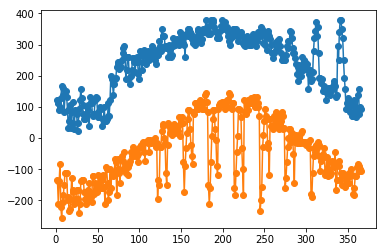

In [9]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
# print(df)
df.set_index("ID", inplace=True)
# print(df)
df_UMich = df.loc['USC00200230'].sort(['Date'])
# print(df_UMich)
df_UMich = df_UMich.reset_index()
# print(df_UMich)

# Here, let's use only data from 2005 to 2014, not 2015, and re-name the dataframe as df_UMich

for col in df_UMich.columns: 
    print(col)

# print(df_UMich)
df_UMich_2005_2014 = df_UMich.loc[df_UMich['Date'].apply(lambda x: x.split('-')[0] in ['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014'] )] 
# print(df_UMich)

df_UMich_TMAX_2005_2014 = df_UMich_2005_2014.loc[df_UMich['Element'] == 'TMAX']
df_UMich_TMIN_2005_2014 = df_UMich_2005_2014.loc[df_UMich['Element'] == 'TMIN']
# print(type(df_UMich_TMAX))
# print(df_UMich_TMAX)

# df_UMich_TMAX_array = df_UMich_TMAX.values
# df_UMich_TMIN_array = df_UMich_TMIN.values

# df_UMich_dates = np.delete(df_UMich_dates,[0,1,2,3])
# df_UMich_TMAX_array = np.delete(df_UMich_TMAX_array,[0,1])
# print(len(df_UMich_TMAX_array))
# print(len(df_UMich_TMIN_array))
# print(len(df_UMich_dates))
# print(df_UMich_TMAX_array)
# print(df_UMich_TMIN_array)
# print(df_UMich_dates)

# function to get unique values 
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list and x[5:] != '02-29': 
            unique_list.append(x) 
    return unique_list

days_list = []
for date in df_UMich_2005_2014['Date']:
    if '2008' in date:
        days_list.append(date)
# print(unique(days_list))
# print(len(unique(days_list)))

days_without_year_list = []
for date in days_list:
    days_without_year_list.append(date[5:])
# print(unique(days_without_year_list))

# Next, get record high and record low of each date between 2005 to 2014
date_TMAX_dic_2005_2014 = {}
    
date_TMAX_dic_2005_2014 = {day_el: [] for day_el in days_without_year_list}

for day_el in days_without_year_list:
    for el_df_UMich_TMAX_2005_2014 in df_UMich_TMAX_2005_2014['Date']:
        if day_el in el_df_UMich_TMAX_2005_2014:
            date_TMAX_dic_2005_2014[day_el].append(df_UMich_TMAX_2005_2014.loc[df_UMich_TMAX_2005_2014['Date'] == el_df_UMich_TMAX_2005_2014]['Data_Value'])
            

df_dic = date_TMAX_dic_2005_2014
date_TMAX_dic_2005_2014_2 = {}
date_TMAX_dic_2005_2014_2 = {day_el: [-500] for day_el in days_without_year_list}

for day_dic_el in df_dic:
    for el in df_dic[day_dic_el]:
        if el.values[0] > date_TMAX_dic_2005_2014_2[day_dic_el]:
            date_TMAX_dic_2005_2014_2[day_dic_el] = el.values[0]

# print(date_TMAX_dic_2005_2014_2)
# print(len(date_TMAX_dic_2005_2014_2))

#Now I got a max temp on each day
#do the same thing for TMIN
date_TMIN_dic_2005_2014 = {}
    
date_TMIN_dic_2005_2014 = {day_el: [] for day_el in days_without_year_list}

for day_el in days_without_year_list:
    for el_df_UMich_TMIN_2005_2014 in df_UMich_TMIN_2005_2014['Date']:
        if day_el in el_df_UMich_TMIN_2005_2014:
            date_TMIN_dic_2005_2014[day_el].append(df_UMich_TMIN_2005_2014.loc[df_UMich_TMIN_2005_2014['Date'] == el_df_UMich_TMIN_2005_2014]['Data_Value'])
            

df_dic = date_TMIN_dic_2005_2014
date_TMIN_dic_2005_2014_2 = {}
date_TMIN_dic_2005_2014_2 = {day_el: [500] for day_el in days_without_year_list}

for day_dic_el in df_dic:
    for el in df_dic[day_dic_el]:
        if el.values[0] < date_TMIN_dic_2005_2014_2[day_dic_el]:
            date_TMIN_dic_2005_2014_2[day_dic_el] = el.values[0]

# print(date_TMIN_dic_2005_2014_2)


# Now, I use only data from 2005-2014, currently I am using all years from 2004 to 2015
# Next, let's do the same thing with only 2015 data

df_UMich_2015 = df_UMich.loc[df_UMich['Date'].apply(lambda x: x.split('-')[0] == '2015')]
df_UMich_TMAX_2015 = df_UMich_2015.loc[df_UMich_2015['Element'] == 'TMAX']
df_UMich_TMIN_2015 = df_UMich_2015.loc[df_UMich_2015['Element'] == 'TMIN']

date_TMAX_dic_2015 = {}
    
date_TMAX_dic_2015 = {day_el: [] for day_el in days_without_year_list}

for day_el in days_without_year_list:
    for el_df_UMich_TMAX_2015 in df_UMich_TMAX_2015['Date']:
        if day_el in el_df_UMich_TMAX_2015:
            date_TMAX_dic_2015[day_el].append(df_UMich_TMAX_2015.loc[df_UMich_TMAX_2015['Date'] == el_df_UMich_TMAX_2015]['Data_Value'])
            

df_dic = date_TMAX_dic_2015
date_TMAX_dic_2015_2 = {}
date_TMAX_dic_2015_2 = {day_el: [-500] for day_el in days_without_year_list}

for day_dic_el in df_dic:
    for el in df_dic[day_dic_el]:
        if el.values[0] > date_TMAX_dic_2015_2[day_dic_el]:
            date_TMAX_dic_2015_2[day_dic_el] = el.values[0]

# print(date_TMAX_dic_2015_2)

date_TMIN_dic_2015 = {}
    
date_TMIN_dic_2015 = {day_el: [] for day_el in days_without_year_list}

for day_el in days_without_year_list:
    for el_df_UMich_TMIN_2015 in df_UMich_TMIN_2015['Date']:
        if day_el in el_df_UMich_TMIN_2015:
            date_TMIN_dic_2015[day_el].append(df_UMich_TMIN_2015.loc[df_UMich_TMIN_2015['Date'] == el_df_UMich_TMIN_2015]['Data_Value'])
            

df_dic = date_TMIN_dic_2015
date_TMIN_dic_2015_2 = {}
date_TMIN_dic_2015_2 = {day_el: [-500] for day_el in days_without_year_list}

for day_dic_el in df_dic:
    for el in df_dic[day_dic_el]:
        if el.values[0] > date_TMIN_dic_2015_2[day_dic_el]:
            date_TMIN_dic_2015_2[day_dic_el] = el.values[0]

# print(date_TMIN_dic_2015_2)


# Now, I got TMAX, TMIN during 2005 to 2014 and TMAX, TMIN for 2015
# Next, let's plot these data


import matplotlib.pyplot as plt

# plt.plot(*zip(*sorted(date_TMIN_dic_2005_2014_2.items())))
# plt.show()



# date_TMAX_dic_2[day_dic_el].append(el.values[0])

# print(len(df_UMich_TMAX['Date']))
# print(df_UMich_TMAX)


# df_UMich_TMAX.loc[df_UMich_TMAX['Element'] == 'TMAX']
            
# observation_dates_array = df_UMich_dates
# observation_dates = list(map(pd.to_datetime, observation_dates_array)) # trying to plot a map will result in an error
# plt.plot(observation_dates, df_UMich_TMAX_array, '-o',  observation_dates, df_UMich_TMIN_array, '-o')
# plt.show()

one_year_array = pd.Series(range(1,len(date_TMAX_dic_2005_2014_2)+1)).values
# print(one_year_array)


TMAX_df_from_dic_to_array = pd.DataFrame.from_dict(date_TMAX_dic_2005_2014_2, orient='index').values
TMIN_df_from_dic_to_array = pd.DataFrame.from_dict(date_TMIN_dic_2005_2014_2, orient='index').values
# print(type(TMAX_df_from_dic_to_array),TMAX_df_from_dic_to_array)

# Next, find dates when 2015 broke the record high and low bewteen 2005 and 2014

plt.figure()
plt.plot(one_year_array, TMAX_df_from_dic_to_array, '-o', one_year_array, TMIN_df_from_dic_to_array, '-o')
plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


ID
Date
Element
Data_Value
365


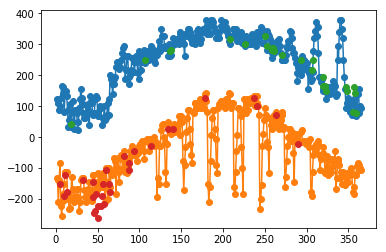

In [ ]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
# print(df)
df.set_index("ID", inplace=True)
# print(df)
df_UMich = df.loc['USC00200230'].sort(['Date'])
# print(df_UMich)
df_UMich = df_UMich.reset_index()
# print(df_UMich)

# Here, let's use only data from 2005 to 2014, not 2015, and re-name the dataframe as df_UMich

for col in df_UMich.columns: 
    print(col)

# print(df_UMich)
df_UMich_2005_2014 = df_UMich.loc[df_UMich['Date'].apply(lambda x: x.split('-')[0] in ['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014'] )] 
# print(df_UMich)

df_UMich_TMAX_2005_2014 = df_UMich_2005_2014.loc[df_UMich['Element'] == 'TMAX']
df_UMich_TMIN_2005_2014 = df_UMich_2005_2014.loc[df_UMich['Element'] == 'TMIN']
# print(type(df_UMich_TMAX))
# print(df_UMich_TMAX)

# df_UMich_TMAX_array = df_UMich_TMAX.values
# df_UMich_TMIN_array = df_UMich_TMIN.values

# df_UMich_dates = np.delete(df_UMich_dates,[0,1,2,3])
# df_UMich_TMAX_array = np.delete(df_UMich_TMAX_array,[0,1])
# print(len(df_UMich_TMAX_array))
# print(len(df_UMich_TMIN_array))
# print(len(df_UMich_dates))
# print(df_UMich_TMAX_array)
# print(df_UMich_TMIN_array)
# print(df_UMich_dates)

# function to get unique values 
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list and x[5:] != '02-29': 
            unique_list.append(x) 
    return unique_list

days_list = []
for date in df_UMich_2005_2014['Date']:
    if '2008' in date:
        days_list.append(date)
# print(unique(days_list))
# print(len(unique(days_list)))

days_without_year_list = []
for date in days_list:
    days_without_year_list.append(date[5:])
# print(unique(days_without_year_list))

# Next, get record high and record low of each date between 2005 to 2014
date_TMAX_dic_2005_2014 = {}
    
date_TMAX_dic_2005_2014 = {day_el: [] for day_el in days_without_year_list}

for day_el in days_without_year_list:
    for el_df_UMich_TMAX_2005_2014 in df_UMich_TMAX_2005_2014['Date']:
        if day_el in el_df_UMich_TMAX_2005_2014:
            date_TMAX_dic_2005_2014[day_el].append(df_UMich_TMAX_2005_2014.loc[df_UMich_TMAX_2005_2014['Date'] == el_df_UMich_TMAX_2005_2014]['Data_Value'])
            

df_dic = date_TMAX_dic_2005_2014
date_TMAX_dic_2005_2014_2 = {}
date_TMAX_dic_2005_2014_2 = {day_el: [-500] for day_el in days_without_year_list}

for day_dic_el in df_dic:
    for el in df_dic[day_dic_el]:
        if el.values[0] > date_TMAX_dic_2005_2014_2[day_dic_el]:
            date_TMAX_dic_2005_2014_2[day_dic_el] = el.values[0]

date_TMAX_dic_2005_2014_2.pop('02-29')
# print(date_TMAX_dic_2005_2014_2)
# print(len(date_TMAX_dic_2005_2014_2))

#Now I got a max temp on each day
#do the same thing for TMIN
date_TMIN_dic_2005_2014 = {}
    
date_TMIN_dic_2005_2014 = {day_el: [] for day_el in days_without_year_list}

for day_el in days_without_year_list:
    for el_df_UMich_TMIN_2005_2014 in df_UMich_TMIN_2005_2014['Date']:
        if day_el in el_df_UMich_TMIN_2005_2014:
            date_TMIN_dic_2005_2014[day_el].append(df_UMich_TMIN_2005_2014.loc[df_UMich_TMIN_2005_2014['Date'] == el_df_UMich_TMIN_2005_2014]['Data_Value'])
            

df_dic = date_TMIN_dic_2005_2014
date_TMIN_dic_2005_2014_2 = {}
date_TMIN_dic_2005_2014_2 = {day_el: [500] for day_el in days_without_year_list}

for day_dic_el in df_dic:
    for el in df_dic[day_dic_el]:
        if el.values[0] < date_TMIN_dic_2005_2014_2[day_dic_el]:
            date_TMIN_dic_2005_2014_2[day_dic_el] = el.values[0]

date_TMIN_dic_2005_2014_2.pop('02-29')
# print(date_TMIN_dic_2005_2014_2)


# Now, I use only data from 2005-2014, currently I am using all years from 2004 to 2015
# Next, let's do the same thing with only 2015 data

df_UMich_2015 = df_UMich.loc[df_UMich['Date'].apply(lambda x: x.split('-')[0] == '2015')]
df_UMich_TMAX_2015 = df_UMich_2015.loc[df_UMich_2015['Element'] == 'TMAX']
df_UMich_TMIN_2015 = df_UMich_2015.loc[df_UMich_2015['Element'] == 'TMIN']

date_TMAX_dic_2015 = {}
    
date_TMAX_dic_2015 = {day_el: [] for day_el in days_without_year_list}

for day_el in days_without_year_list:
    for el_df_UMich_TMAX_2015 in df_UMich_TMAX_2015['Date']:
        if day_el in el_df_UMich_TMAX_2015:
            date_TMAX_dic_2015[day_el].append(df_UMich_TMAX_2015.loc[df_UMich_TMAX_2015['Date'] == el_df_UMich_TMAX_2015]['Data_Value'])
            

df_dic = date_TMAX_dic_2015
date_TMAX_dic_2015_2 = {}
date_TMAX_dic_2015_2 = {day_el: [-500] for day_el in days_without_year_list}

for day_dic_el in df_dic:
    for el in df_dic[day_dic_el]:
        if el.values[0] > date_TMAX_dic_2015_2[day_dic_el]:
            date_TMAX_dic_2015_2[day_dic_el] = el.values[0]

date_TMAX_dic_2015_2.pop('02-29')
# print(date_TMAX_dic_2015_2)

date_TMIN_dic_2015 = {}
    
date_TMIN_dic_2015 = {day_el: [] for day_el in days_without_year_list}

for day_el in days_without_year_list:
    for el_df_UMich_TMIN_2015 in df_UMich_TMIN_2015['Date']:
        if day_el in el_df_UMich_TMIN_2015:
            date_TMIN_dic_2015[day_el].append(df_UMich_TMIN_2015.loc[df_UMich_TMIN_2015['Date'] == el_df_UMich_TMIN_2015]['Data_Value'])
            

df_dic = date_TMIN_dic_2015
date_TMIN_dic_2015_2 = {}
date_TMIN_dic_2015_2 = {day_el: [-500] for day_el in days_without_year_list}

for day_dic_el in df_dic:
    for el in df_dic[day_dic_el]:
        if el.values[0] > date_TMIN_dic_2015_2[day_dic_el]:
            date_TMIN_dic_2015_2[day_dic_el] = el.values[0]

date_TMIN_dic_2015_2.pop('02-29')
# print(date_TMIN_dic_2015_2)


# Now, I got TMAX, TMIN during 2005 to 2014 and TMAX, TMIN for 2015
# Next, let's plot these data


import matplotlib.pyplot as plt

# plt.plot(*zip(*sorted(date_TMIN_dic_2005_2014_2.items())))
# plt.show()



# date_TMAX_dic_2[day_dic_el].append(el.values[0])

# print(len(df_UMich_TMAX['Date']))
# print(df_UMich_TMAX)


# df_UMich_TMAX.loc[df_UMich_TMAX['Element'] == 'TMAX']
            
# observation_dates_array = df_UMich_dates
# observation_dates = list(map(pd.to_datetime, observation_dates_array)) # trying to plot a map will result in an error
# plt.plot(observation_dates, df_UMich_TMAX_array, '-o',  observation_dates, df_UMich_TMIN_array, '-o')
# plt.show()

one_year_array = pd.Series(range(1,len(date_TMAX_dic_2005_2014_2)+1)).values
# print(one_year_array)


TMAX_df_from_dic_to_array = pd.DataFrame.from_dict(date_TMAX_dic_2005_2014_2, orient='index').values
TMIN_df_from_dic_to_array = pd.DataFrame.from_dict(date_TMIN_dic_2005_2014_2, orient='index').values
# print(len(TMAX_df_from_dic_to_array),len(TMIN_df_from_dic_to_array))

# Next, find dates when 2015 broke the record high and low bewteen 2005 and 2014

print(len(date_TMAX_dic_2015_2.items()))
count_1 = 1
TMAX_broke_day_index_list = []
TMAX_borke_temp_list = []
for el_1,el_2 in date_TMAX_dic_2015_2.items():
    if el_2 > date_TMAX_dic_2005_2014_2.get(el_1):
        TMAX_broke_day_index_list.append(count_1)
        TMAX_borke_temp_list.append(el_2)
        count_1 += 1
    else:
        count_1 += 1

count_2 = 1
TMIN_broke_day_index_list = []
TMIN_borke_temp_list = []
for el_1,el_2 in date_TMIN_dic_2015_2.items():
    if el_2 < date_TMIN_dic_2005_2014_2.get(el_1):
        TMIN_broke_day_index_list.append(count_2)
        TMIN_borke_temp_list.append(el_2)
        count_2 += 1
    else:
        count_2 += 1

# print(count_1,count_2)
# print(TMAX_broke_day_index_list, TMIN_broke_day_index_list)

# error, It seems you are trying to access index 8 of an array of size 8 (I suppose the vectorActions array.
# You cannot do this as an array of size 0 has indices between 0 and 7.

# Finally, cleaning up figures and all others

TMAX_broke_day_array = np.array(TMAX_broke_day_index_list)
TMIN_broke_day_array = np.array(TMIN_broke_day_index_list)
TMAX_broke_temp_array = np.array(TMAX_borke_temp_list)
TMIN_broke_temp_array = np.array(TMIN_borke_temp_list)

plt.figure()
plt.plot(one_year_array, TMAX_df_from_dic_to_array, '-o', one_year_array, TMIN_df_from_dic_to_array, '-o', TMAX_broke_day_array, TMAX_broke_temp_array, 'o', TMIN_broke_day_array, TMIN_broke_temp_array, 'o')
plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


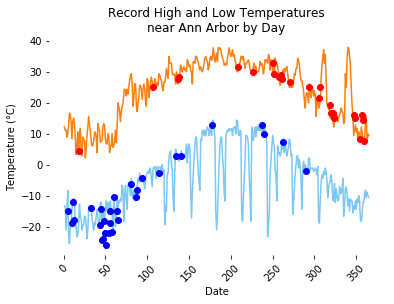

In [14]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df.set_index("ID", inplace=True)
df_UMich = df.loc['USC00200230'].sort(['Date'])
df_UMich = df_UMich.reset_index()

# Here, let's use only data from 2005 to 2014, not 2015, and re-name the dataframe as df_UMich
df_UMich_2005_2014 = df_UMich.loc[df_UMich['Date'].apply(lambda x: x.split('-')[0] in ['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014'] )] 

df_UMich_TMAX_2005_2014 = df_UMich_2005_2014.loc[df_UMich['Element'] == 'TMAX']
df_UMich_TMIN_2005_2014 = df_UMich_2005_2014.loc[df_UMich['Element'] == 'TMIN']

# list of all days without year
days_list = []
for date in df_UMich_2005_2014['Date']:
    if '2008' in date:
        days_list.append(date)

days_without_year_list = []
for date in days_list:
    days_without_year_list.append(date[5:])

# Next, get record high and record low of each date between 2005 to 2014
date_TMAX_dic_2005_2014 = {}
    
date_TMAX_dic_2005_2014 = {day_el: [] for day_el in days_without_year_list}

for day_el in days_without_year_list:
    for el_df_UMich_TMAX_2005_2014 in df_UMich_TMAX_2005_2014['Date']:
        if day_el in el_df_UMich_TMAX_2005_2014:
            date_TMAX_dic_2005_2014[day_el].append(df_UMich_TMAX_2005_2014.loc[df_UMich_TMAX_2005_2014['Date'] == el_df_UMich_TMAX_2005_2014]['Data_Value'])
            

df_dic = date_TMAX_dic_2005_2014
date_TMAX_dic_2005_2014_2 = {}
date_TMAX_dic_2005_2014_2 = {day_el: [-500] for day_el in days_without_year_list}

for day_dic_el in df_dic:
    for el in df_dic[day_dic_el]:
        if el.values[0] > date_TMAX_dic_2005_2014_2[day_dic_el]:
            date_TMAX_dic_2005_2014_2[day_dic_el] = el.values[0]

date_TMAX_dic_2005_2014_2.pop('02-29')

#Now I got max temp and min temp on each day
date_TMIN_dic_2005_2014 = {}
    
date_TMIN_dic_2005_2014 = {day_el: [] for day_el in days_without_year_list}

for day_el in days_without_year_list:
    for el_df_UMich_TMIN_2005_2014 in df_UMich_TMIN_2005_2014['Date']:
        if day_el in el_df_UMich_TMIN_2005_2014:
            date_TMIN_dic_2005_2014[day_el].append(df_UMich_TMIN_2005_2014.loc[df_UMich_TMIN_2005_2014['Date'] == el_df_UMich_TMIN_2005_2014]['Data_Value'])
            
df_dic = date_TMIN_dic_2005_2014
date_TMIN_dic_2005_2014_2 = {}
date_TMIN_dic_2005_2014_2 = {day_el: [500] for day_el in days_without_year_list}

for day_dic_el in df_dic:
    for el in df_dic[day_dic_el]:
        if el.values[0] < date_TMIN_dic_2005_2014_2[day_dic_el]:
            date_TMIN_dic_2005_2014_2[day_dic_el] = el.values[0]

date_TMIN_dic_2005_2014_2.pop('02-29')

# do the same thing with only 2015 data

df_UMich_2015 = df_UMich.loc[df_UMich['Date'].apply(lambda x: x.split('-')[0] == '2015')]
df_UMich_TMAX_2015 = df_UMich_2015.loc[df_UMich_2015['Element'] == 'TMAX']
df_UMich_TMIN_2015 = df_UMich_2015.loc[df_UMich_2015['Element'] == 'TMIN']

date_TMAX_dic_2015 = {}
    
date_TMAX_dic_2015 = {day_el: [] for day_el in days_without_year_list}

for day_el in days_without_year_list:
    for el_df_UMich_TMAX_2015 in df_UMich_TMAX_2015['Date']:
        if day_el in el_df_UMich_TMAX_2015:
            date_TMAX_dic_2015[day_el].append(df_UMich_TMAX_2015.loc[df_UMich_TMAX_2015['Date'] == el_df_UMich_TMAX_2015]['Data_Value'])
            
df_dic = date_TMAX_dic_2015
date_TMAX_dic_2015_2 = {}
date_TMAX_dic_2015_2 = {day_el: [-500] for day_el in days_without_year_list}

for day_dic_el in df_dic:
    for el in df_dic[day_dic_el]:
        if el.values[0] > date_TMAX_dic_2015_2[day_dic_el]:
            date_TMAX_dic_2015_2[day_dic_el] = el.values[0]

date_TMAX_dic_2015_2.pop('02-29')

date_TMIN_dic_2015 = {}
    
date_TMIN_dic_2015 = {day_el: [] for day_el in days_without_year_list}

for day_el in days_without_year_list:
    for el_df_UMich_TMIN_2015 in df_UMich_TMIN_2015['Date']:
        if day_el in el_df_UMich_TMIN_2015:
            date_TMIN_dic_2015[day_el].append(df_UMich_TMIN_2015.loc[df_UMich_TMIN_2015['Date'] == el_df_UMich_TMIN_2015]['Data_Value'])
            

df_dic = date_TMIN_dic_2015
date_TMIN_dic_2015_2 = {}
date_TMIN_dic_2015_2 = {day_el: [-500] for day_el in days_without_year_list}

for day_dic_el in df_dic:
    for el in df_dic[day_dic_el]:
        if el.values[0] > date_TMIN_dic_2015_2[day_dic_el]:
            date_TMIN_dic_2015_2[day_dic_el] = el.values[0]

date_TMIN_dic_2015_2.pop('02-29')


import matplotlib.pyplot as plt
one_year_array = pd.Series(range(1,len(date_TMAX_dic_2005_2014_2)+1)).values


TMAX_df_from_dic_to_array = pd.DataFrame.from_dict(date_TMAX_dic_2005_2014_2, orient='index').values
TMIN_df_from_dic_to_array = pd.DataFrame.from_dict(date_TMIN_dic_2005_2014_2, orient='index').values

# convert an array to a list and divided by ten, then convert back to an array from the list
TMAX_df_from_dic_to_array_to_list_of_list = TMAX_df_from_dic_to_array.tolist()
TMAX_df_from_dic_to_array_to_list = []
for el in TMAX_df_from_dic_to_array_to_list_of_list:
    TMAX_df_from_dic_to_array_to_list.append(el[0])
TMAX_df_from_dic_to_array_from_list = np.array([x/10 for x in TMAX_df_from_dic_to_array_to_list])

TMIN_df_from_dic_to_array_to_list_of_list = TMIN_df_from_dic_to_array.tolist()
TMIN_df_from_dic_to_array_to_list = []
for el in TMIN_df_from_dic_to_array_to_list_of_list:
    TMIN_df_from_dic_to_array_to_list.append(el[0])
TMIN_df_from_dic_to_array_from_list = np.array([x/10 for x in TMIN_df_from_dic_to_array_to_list])

# Next, find dates when 2015 broke the record high and low bewteen 2005 and 2014
count_1 = 1
TMAX_broke_day_index_list = []
TMAX_borke_temp_list = []
for el_1,el_2 in date_TMAX_dic_2015_2.items():
    if el_2 > date_TMAX_dic_2005_2014_2.get(el_1):
        TMAX_broke_day_index_list.append(count_1)
        TMAX_borke_temp_list.append(el_2)
        count_1 += 1
    else:
        count_1 += 1

count_2 = 1
TMIN_broke_day_index_list = []
TMIN_borke_temp_list = []
for el_1,el_2 in date_TMIN_dic_2015_2.items():
    if el_2 < date_TMIN_dic_2005_2014_2.get(el_1):
        TMIN_broke_day_index_list.append(count_2)
        TMIN_borke_temp_list.append(el_2)
        count_2 += 1
    else:
        count_2 += 1

TMAX_broke_day_array = np.array(TMAX_broke_day_index_list)
TMIN_broke_day_array = np.array(TMIN_broke_day_index_list)
TMAX_broke_temp_array = np.array([x/10 for x in TMAX_borke_temp_list])
TMIN_broke_temp_array = np.array([x/10 for x in TMIN_borke_temp_list])
# print(TMAX_borke_temp_list)

plt.figure()
# TMAX_df_from_dic_to_array = (1/10)*np.arange(TMAX_df_from_dic_to_array.size)
# TMIN_df_from_dic_to_array = (1/10)*np.arange(TMIN_df_from_dic_to_array.size)
# TMAX_broke_temp_array = (1/10)*np.arange(TMAX_broke_temp_array.size)
# TMIN_broke_temp_array = (1/10)*np.arange(TMIN_broke_temp_array.size)
plt.plot(one_year_array, TMAX_df_from_dic_to_array_from_list, 'tab:orange', one_year_array, TMIN_df_from_dic_to_array_from_list, 'xkcd:lightblue', TMAX_broke_day_array, TMAX_broke_temp_array, 'ro', TMIN_broke_day_array, TMIN_broke_temp_array, 'bo')

ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (°C)')
from textwrap import wrap
ax.set_title("\n".join(wrap('Record High and Low Temperatures near Ann Arbor by Day',35)))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in ax.xaxis.get_ticklabels():
    item.set_rotation(45)
    
# for item in ax.xaxis.get_ticklabels():
#     item.set_rotation(45)

plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


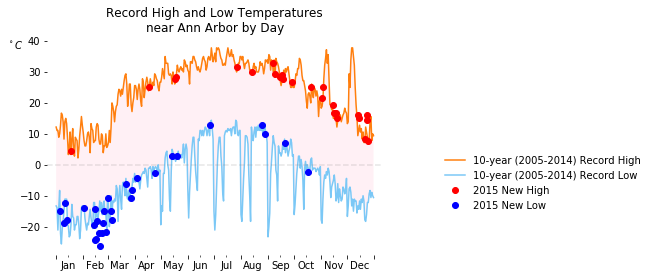

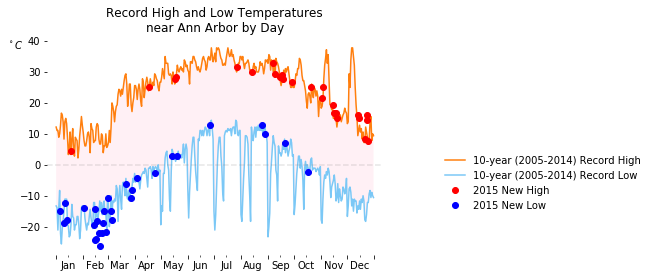

In [ ]:
from matplotlib.ticker import NullFormatter
from matplotlib.dates import MonthLocator, DateFormatter

df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df.set_index("ID", inplace=True)
df_UMich = df.loc['USC00200230'].sort(['Date'])
df_UMich = df_UMich.reset_index()

# Here, let's use only data from 2005 to 2014, not 2015, and re-name the dataframe as df_UMich
df_UMich_2005_2014 = df_UMich.loc[df_UMich['Date'].apply(lambda x: x.split('-')[0] in ['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014'] )] 

df_UMich_TMAX_2005_2014 = df_UMich_2005_2014.loc[df_UMich['Element'] == 'TMAX']
df_UMich_TMIN_2005_2014 = df_UMich_2005_2014.loc[df_UMich['Element'] == 'TMIN']

# list of all days without year
days_list = []
for date in df_UMich_2005_2014['Date']:
    if '2008' in date:
        days_list.append(date)

days_without_year_list = []
for date in days_list:
    days_without_year_list.append(date[5:])

# Next, get record high and record low of each date between 2005 to 2014
date_TMAX_dic_2005_2014 = {}
    
date_TMAX_dic_2005_2014 = {day_el: [] for day_el in days_without_year_list}

for day_el in days_without_year_list:
    for el_df_UMich_TMAX_2005_2014 in df_UMich_TMAX_2005_2014['Date']:
        if day_el in el_df_UMich_TMAX_2005_2014:
            date_TMAX_dic_2005_2014[day_el].append(df_UMich_TMAX_2005_2014.loc[df_UMich_TMAX_2005_2014['Date'] == el_df_UMich_TMAX_2005_2014]['Data_Value'])
            

df_dic = date_TMAX_dic_2005_2014
date_TMAX_dic_2005_2014_2 = {}
date_TMAX_dic_2005_2014_2 = {day_el: [-500] for day_el in days_without_year_list}

for day_dic_el in df_dic:
    for el in df_dic[day_dic_el]:
        if el.values[0] > date_TMAX_dic_2005_2014_2[day_dic_el]:
            date_TMAX_dic_2005_2014_2[day_dic_el] = el.values[0]

date_TMAX_dic_2005_2014_2.pop('02-29')

#Now I got max temp and min temp on each day
date_TMIN_dic_2005_2014 = {}
    
date_TMIN_dic_2005_2014 = {day_el: [] for day_el in days_without_year_list}

for day_el in days_without_year_list:
    for el_df_UMich_TMIN_2005_2014 in df_UMich_TMIN_2005_2014['Date']:
        if day_el in el_df_UMich_TMIN_2005_2014:
            date_TMIN_dic_2005_2014[day_el].append(df_UMich_TMIN_2005_2014.loc[df_UMich_TMIN_2005_2014['Date'] == el_df_UMich_TMIN_2005_2014]['Data_Value'])
            
df_dic = date_TMIN_dic_2005_2014
date_TMIN_dic_2005_2014_2 = {}
date_TMIN_dic_2005_2014_2 = {day_el: [500] for day_el in days_without_year_list}

for day_dic_el in df_dic:
    for el in df_dic[day_dic_el]:
        if el.values[0] < date_TMIN_dic_2005_2014_2[day_dic_el]:
            date_TMIN_dic_2005_2014_2[day_dic_el] = el.values[0]

date_TMIN_dic_2005_2014_2.pop('02-29')

# do the same thing with only 2015 data

df_UMich_2015 = df_UMich.loc[df_UMich['Date'].apply(lambda x: x.split('-')[0] == '2015')]
df_UMich_TMAX_2015 = df_UMich_2015.loc[df_UMich_2015['Element'] == 'TMAX']
df_UMich_TMIN_2015 = df_UMich_2015.loc[df_UMich_2015['Element'] == 'TMIN']

date_TMAX_dic_2015 = {}
    
date_TMAX_dic_2015 = {day_el: [] for day_el in days_without_year_list}

for day_el in days_without_year_list:
    for el_df_UMich_TMAX_2015 in df_UMich_TMAX_2015['Date']:
        if day_el in el_df_UMich_TMAX_2015:
            date_TMAX_dic_2015[day_el].append(df_UMich_TMAX_2015.loc[df_UMich_TMAX_2015['Date'] == el_df_UMich_TMAX_2015]['Data_Value'])
            
df_dic = date_TMAX_dic_2015
date_TMAX_dic_2015_2 = {}
date_TMAX_dic_2015_2 = {day_el: [-500] for day_el in days_without_year_list}

for day_dic_el in df_dic:
    for el in df_dic[day_dic_el]:
        if el.values[0] > date_TMAX_dic_2015_2[day_dic_el]:
            date_TMAX_dic_2015_2[day_dic_el] = el.values[0]

date_TMAX_dic_2015_2.pop('02-29')

date_TMIN_dic_2015 = {}
    
date_TMIN_dic_2015 = {day_el: [] for day_el in days_without_year_list}

for day_el in days_without_year_list:
    for el_df_UMich_TMIN_2015 in df_UMich_TMIN_2015['Date']:
        if day_el in el_df_UMich_TMIN_2015:
            date_TMIN_dic_2015[day_el].append(df_UMich_TMIN_2015.loc[df_UMich_TMIN_2015['Date'] == el_df_UMich_TMIN_2015]['Data_Value'])
            

df_dic = date_TMIN_dic_2015
date_TMIN_dic_2015_2 = {}
date_TMIN_dic_2015_2 = {day_el: [-500] for day_el in days_without_year_list}

for day_dic_el in df_dic:
    for el in df_dic[day_dic_el]:
        if el.values[0] > date_TMIN_dic_2015_2[day_dic_el]:
            date_TMIN_dic_2015_2[day_dic_el] = el.values[0]

date_TMIN_dic_2015_2.pop('02-29')


import matplotlib.pyplot as plt
one_year_array = pd.Series(range(1,len(date_TMAX_dic_2005_2014_2)+1)).values


TMAX_df_from_dic_to_array = pd.DataFrame.from_dict(date_TMAX_dic_2005_2014_2, orient='index').values
TMIN_df_from_dic_to_array = pd.DataFrame.from_dict(date_TMIN_dic_2005_2014_2, orient='index').values

# convert an array to a list and divided by ten, then convert back to an array from the list
TMAX_df_from_dic_to_array_to_list_of_list = TMAX_df_from_dic_to_array.tolist()
TMAX_df_from_dic_to_array_to_list = []
for el in TMAX_df_from_dic_to_array_to_list_of_list:
    TMAX_df_from_dic_to_array_to_list.append(el[0])
TMAX_df_from_dic_to_array_from_list = np.array([x/10 for x in TMAX_df_from_dic_to_array_to_list])

TMIN_df_from_dic_to_array_to_list_of_list = TMIN_df_from_dic_to_array.tolist()
TMIN_df_from_dic_to_array_to_list = []
for el in TMIN_df_from_dic_to_array_to_list_of_list:
    TMIN_df_from_dic_to_array_to_list.append(el[0])
TMIN_df_from_dic_to_array_from_list = np.array([x/10 for x in TMIN_df_from_dic_to_array_to_list])

# Next, find dates when 2015 broke the record high and low bewteen 2005 and 2014
count_1 = 1
TMAX_broke_day_index_list = []
TMAX_borke_temp_list = []
for el_1,el_2 in date_TMAX_dic_2015_2.items():
    if el_2 > date_TMAX_dic_2005_2014_2.get(el_1):
        TMAX_broke_day_index_list.append(count_1)
        TMAX_borke_temp_list.append(el_2)
        count_1 += 1
    else:
        count_1 += 1

count_2 = 1
TMIN_broke_day_index_list = []
TMIN_borke_temp_list = []
for el_1,el_2 in date_TMIN_dic_2015_2.items():
    if el_2 < date_TMIN_dic_2005_2014_2.get(el_1):
        TMIN_broke_day_index_list.append(count_2)
        TMIN_borke_temp_list.append(el_2)
        count_2 += 1
    else:
        count_2 += 1

TMAX_broke_day_array = np.array(TMAX_broke_day_index_list)
TMIN_broke_day_array = np.array(TMIN_broke_day_index_list)
TMAX_broke_temp_array = np.array([x/10 for x in TMAX_borke_temp_list])
TMIN_broke_temp_array = np.array([x/10 for x in TMIN_borke_temp_list])


plt.figure()

observation_dates = np.arange('2015-01-01', '2016-01-01', dtype = 'datetime64[D]')

count_3 = 1
TMAX_broke_obs_date_list = []
for obs_dates_el in observation_dates.tolist():
    if count_3 in TMAX_broke_day_index_list:
        TMAX_broke_obs_date_list.append(obs_dates_el)
        count_3 += 1
    else:
        count_3 += 1
TMAX_broke_obs_date_array = np.array(TMAX_broke_obs_date_list)


count_4 = 1
TMIN_broke_obs_date_list = []
for obs_dates_el in observation_dates.tolist():
    if count_4 in TMIN_broke_day_index_list:
        TMIN_broke_obs_date_list.append(obs_dates_el)
        count_4 += 1
    else:
        count_4 += 1
TMIN_broke_obs_date_array = np.array(TMIN_broke_obs_date_list)    
    
plt.plot(observation_dates, TMAX_df_from_dic_to_array_from_list, 'tab:orange', zorder = 1, 
         label = '10-year (2005-2014) Record High')
plt.plot(observation_dates, TMIN_df_from_dic_to_array_from_list, 'xkcd:lightblue', zorder = 1,
         label = '10-year (2005-2014) Record Low')
plt.plot(TMAX_broke_obs_date_array, TMAX_broke_temp_array, 'ro', zorder = 1, 
         label = '2015 New High')
plt.plot(TMIN_broke_obs_date_array, TMIN_broke_temp_array, 'bo', zorder = 1, 
         label = '2015 New Low')

ax = plt.gca()
# Set title
from textwrap import wrap
ax.set_title("\n".join(wrap('Record High and Low Temperatures near Ann Arbor by Day',35)))
# Set labels for the y axes.
ax.set_ylabel('$^\circ C$', rotation = 0, position = (0, 0.94))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Shade the area between the area between the record high and record low temperatures.
ax.fill_between(x = observation_dates, 
                y1 = TMAX_df_from_dic_to_array_from_list, y2 = TMIN_df_from_dic_to_array_from_list, 
                facecolor = 'lavenderblush')

# Add the 0 degree celsius line.
plt.axhline(linestyle = '--', color = 'gray', linewidth = 0.3) 

################ Deal with the legend, axis, title, etc. ##################
plt.legend(bbox_to_anchor = (1.8, 0.5), frameon = False)

# Increase the left and right margin to better show the edge points.
ax.set_xlim(observation_dates[0] - 10, observation_dates[364] + 10)

# Set major x ticks at the beginning/end of each month and add minor ticks at the 
# 15th day of each month.
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_minor_locator(MonthLocator(bymonthday = 15))

# Put the abbr. month labels in the middle of of the span of each month.
ax.xaxis.set_major_formatter(NullFormatter())
ax.xaxis.set_minor_formatter(DateFormatter('%b'))

plt.show()